# Seminar 2: Predicting Biodegradability of Chemical

## 1. Introduction
Chemicals are all around us. Studying their properties by the means of machine learning is an active
research field; matching molecular patterns with their behavior can be a decisive factor in the creation of
new materials, drugs, and more.
In this seminar assignment, your task is to explore the data and build machine-learning models that
predict the biodegradability of chemicals.

## 2. Task
You will work with the data set compiled by Mansouri et al. [data](https://www.openml.org/search?type=data&status=active&id=1494&sort=runs). There are 41 features and one target feature (biodegradability).
The target variable is encoded as ready biodegradable (1) and not ready biodegradable (2). The data set
consists of 1055 instances. Features can be either symbolic or numeric.
IMPORTANT: Use the dataset provided on uˇcilnica and NOT the one posted on the link above. It is
minimally modified and split into train in test sets.


### 2.1 Exploration
Inspect the dataset. How balanced is the target variable? Are there any missing values present? If there
are, choose a strategy that takes this into account.
Most of your data is of the numeric type. Can you identify, by adopting exploratory analysis, whether
some features are directly related to the target? What about feature pairs? Produce at least three types of
visualizations of the feature space and be prepared to argue why these visualizations were useful for your
subsequent analysis.

In [1]:
# Needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import scikitplot as skplt
import warnings
warnings.filterwarnings(action='once')


In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#### Lets inspect training and test data

In [3]:
df_test.head()

V1      V2  V3  V4  V5  V6  V7    V8  V9  V10  ...  V33  V34  V35  \
1   3.919  2.6909   0   0   0   0   0  31.4   2    0  ...    0    0    0   
2   4.170  2.1144   0   0   0   0   0  30.8   1    1  ...    0    0    0   
4   3.000  2.7098   0   0   0   0   0  20.0   0    2  ...    0    0    1   
13  4.214  2.6272   0   0   0   0   0  30.0   3    0  ...    0    0    0   
16  3.942  2.7719   1   0   0   0   0  31.6   2    0  ...    0    0    0   

      V36    V37  V38    V39  V40  V41  Class  
1   2.949  1.591    0  7.253    0    0      2  
2   3.315  1.967    0  7.257    0    0      2  
4   3.046  5.000    0  6.690    0    0      2  
13  2.998  1.722    0  6.770    0    0      2  
16  3.542  1.739    0  8.127    0    1      2  

[5 rows x 42 columns]

In [4]:
df_train.describe()

V1          V2          V3          V4          V5          V6  \
count  846.000000  846.000000  846.000000  821.000000  846.000000  846.000000   
mean     4.790476    3.054551    0.739953    0.030451    0.946809    0.277778   
std      0.531991    0.813983    1.504545    0.198281    2.318081    1.045544   
min      2.000000    0.803900    0.000000    0.000000    0.000000    0.000000   
25%      4.499000    2.510175    0.000000    0.000000    0.000000    0.000000   
50%      4.840000    3.052400    0.000000    0.000000    0.000000    0.000000   
75%      5.119000    3.415725    1.000000    0.000000    1.000000    0.000000   
max      6.496000    7.918400   12.000000    2.000000   36.000000   13.000000   

               V7          V8          V9         V10  ...         V33  \
count  846.000000  846.000000  846.000000  846.000000  ...  846.000000   
mean     1.669031   37.422813    1.342790    1.784870  ...    0.903073   
std      2.220221    9.030008    2.018433    1.773856  ...    1.526124   
min      0.000000    9.100000    0.000000    0.000000  ...    0.000000   
25%      0.000000   30.800000    0.000000    0.000000  ...    0.000000   
50%      1.000000   37.850000    1.000000    1.500000  ...    0.000000   
75%      3.000000   43.800000    2.000000    3.000000  ...    1.000000   
max     18.000000   60.700000   24.000000   12.000000  ...   12.000000   

              V34         V35         V36         V37         V38         V39  \
count  846.000000  846.000000  846.000000  821.000000  846.000000  846.000000   
mean     1.241135    0.926714    3.922100    2.549406    0.671395    8.643191   
std      2.248684    1.239133    0.992636    0.625021    1.093633    1.223700   
min      0.000000    0.000000    2.279000    1.467000    0.000000    4.948000   
25%      0.000000    0.000000    3.497000    2.101000    0.000000    8.009500   
50%      0.000000    1.000000    3.732500    2.461000    0.000000    8.508000   
75%      2.000000    1.000000    3.980000    2.861000    1.000000    9.019750   
max     18.000000    7.000000   10.695000    5.750000    8.000000   14.700000   

              V40         V41       Class  
count  846.000000  846.000000  846.000000  
mean     0.059102    0.706856    1.333333  
std      0.342364    2.145396    0.471683  
min      0.000000    0.000000    1.000000  
25%      0.000000    0.000000    1.000000  
50%      0.000000    0.000000    1.000000  
75%      0.000000    0.000000    2.000000  
max      4.000000   27.000000    2.000000  

[8 rows x 42 columns]

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 3 to 1055
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      846 non-null    float64
 1   V2      846 non-null    float64
 2   V3      846 non-null    int64  
 3   V4      821 non-null    float64
 4   V5      846 non-null    int64  
 5   V6      846 non-null    int64  
 6   V7      846 non-null    int64  
 7   V8      846 non-null    float64
 8   V9      846 non-null    int64  
 9   V10     846 non-null    int64  
 10  V11     846 non-null    int64  
 11  V12     846 non-null    float64
 12  V13     846 non-null    float64
 13  V14     846 non-null    float64
 14  V15     846 non-null    float64
 15  V16     846 non-null    int64  
 16  V17     846 non-null    float64
 17  V18     846 non-null    float64
 18  V19     846 non-null    int64  
 19  V20     846 non-null    int64  
 20  V21     846 non-null    int64  
 21  V22     830 non-null    float64
 22  V

In [6]:
df_test.head()

V1      V2  V3  V4  V5  V6  V7    V8  V9  V10  ...  V33  V34  V35  \
1   3.919  2.6909   0   0   0   0   0  31.4   2    0  ...    0    0    0   
2   4.170  2.1144   0   0   0   0   0  30.8   1    1  ...    0    0    0   
4   3.000  2.7098   0   0   0   0   0  20.0   0    2  ...    0    0    1   
13  4.214  2.6272   0   0   0   0   0  30.0   3    0  ...    0    0    0   
16  3.942  2.7719   1   0   0   0   0  31.6   2    0  ...    0    0    0   

      V36    V37  V38    V39  V40  V41  Class  
1   2.949  1.591    0  7.253    0    0      2  
2   3.315  1.967    0  7.257    0    0      2  
4   3.046  5.000    0  6.690    0    0      2  
13  2.998  1.722    0  6.770    0    0      2  
16  3.542  1.739    0  8.127    0    1      2  

[5 rows x 42 columns]

In [7]:
df_test.describe()

V1          V2         V3          V4          V5          V6  \
count  209.000000  209.000000  209.00000  209.000000  209.000000  209.000000   
mean     4.750938    3.130050    0.62201    0.086124    1.114833    0.339713   
std      0.603914    0.897556    1.27690    0.406969    2.393143    1.182566   
min      2.000000    1.134900    0.00000    0.000000    0.000000    0.000000   
25%      4.414000    2.494500    0.00000    0.000000    0.000000    0.000000   
50%      4.807000    3.039300    0.00000    0.000000    0.000000    0.000000   
75%      5.188000    3.555400    1.00000    0.000000    1.000000    0.000000   
max      6.253000    9.177500    8.00000    3.000000   16.000000   12.000000   

               V7          V8          V9         V10  ...         V33  \
count  209.000000  209.000000  209.000000  209.000000  ...  209.000000   
mean     1.555024   35.569378    1.511962    1.880383  ...    0.803828   
std      2.246383    9.471334    1.721220    1.784023  ...    1.498327   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000   29.400000    0.000000    0.000000  ...    0.000000   
50%      0.000000   34.200000    1.000000    2.000000  ...    0.000000   
75%      3.000000   41.200000    2.000000    3.000000  ...    1.000000   
max     14.000000   60.000000    9.000000   11.000000  ...   12.000000   

              V34         V35         V36         V37         V38         V39  \
count  209.000000  209.000000  209.000000  209.000000  209.000000  209.000000   
mean     1.411483    1.100478    3.902612    2.629201    0.746411    8.574038   
std      2.374355    1.320857    1.029605    0.714285    1.077657    1.315016   
min      0.000000    0.000000    2.267000    1.576000    0.000000    4.917000   
25%      0.000000    0.000000    3.401000    2.146000    0.000000    7.872000   
50%      0.000000    1.000000    3.694000    2.469000    0.000000    8.464000   
75%      2.000000    2.000000    3.991000    2.967000    1.000000    9.017000   
max     18.000000    6.000000   10.355000    5.825000    6.000000   14.030000   

              V40         V41       Class  
count  209.000000  209.000000  209.000000  
mean     0.019139    0.789474    1.354067  
std      0.195176    2.589491    0.479378  
min      0.000000    0.000000    1.000000  
25%      0.000000    0.000000    1.000000  
50%      0.000000    0.000000    1.000000  
75%      0.000000    0.000000    2.000000  
max      2.000000   27.000000    2.000000  

[8 rows x 42 columns]

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209 entries, 1 to 1051
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      209 non-null    float64
 1   V2      209 non-null    float64
 2   V3      209 non-null    int64  
 3   V4      209 non-null    int64  
 4   V5      209 non-null    int64  
 5   V6      209 non-null    int64  
 6   V7      209 non-null    int64  
 7   V8      209 non-null    float64
 8   V9      209 non-null    int64  
 9   V10     209 non-null    int64  
 10  V11     209 non-null    int64  
 11  V12     209 non-null    float64
 12  V13     209 non-null    float64
 13  V14     209 non-null    float64
 14  V15     209 non-null    float64
 15  V16     209 non-null    int64  
 16  V17     209 non-null    float64
 17  V18     209 non-null    float64
 18  V19     209 non-null    int64  
 19  V20     209 non-null    int64  
 20  V21     209 non-null    int64  
 21  V22     209 non-null    float64
 22  V

#### Display distributions of target variable **Class** in training and validation set.

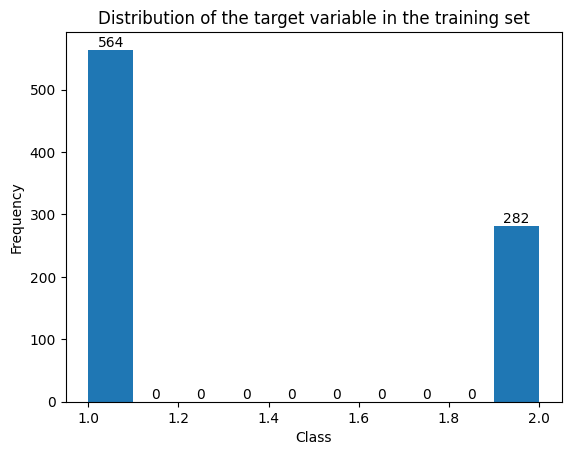

In [9]:
_, _, bars = plt.hist(df_train['Class'], bins=10)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of the target variable in the training set')
plt.bar_label(bars, fmt='%1.0f')
plt.show()

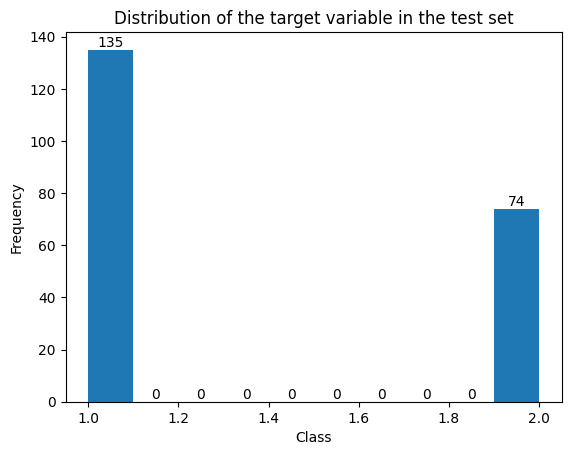

In [10]:
_, _, bars = plt.hist(df_test['Class'], bins=10)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of the target variable in the test set')
plt.bar_label(bars, fmt='%1.0f')
plt.show()

#### Display relationship between features in the training set using the correlation matrix

(42.5, -0.5)

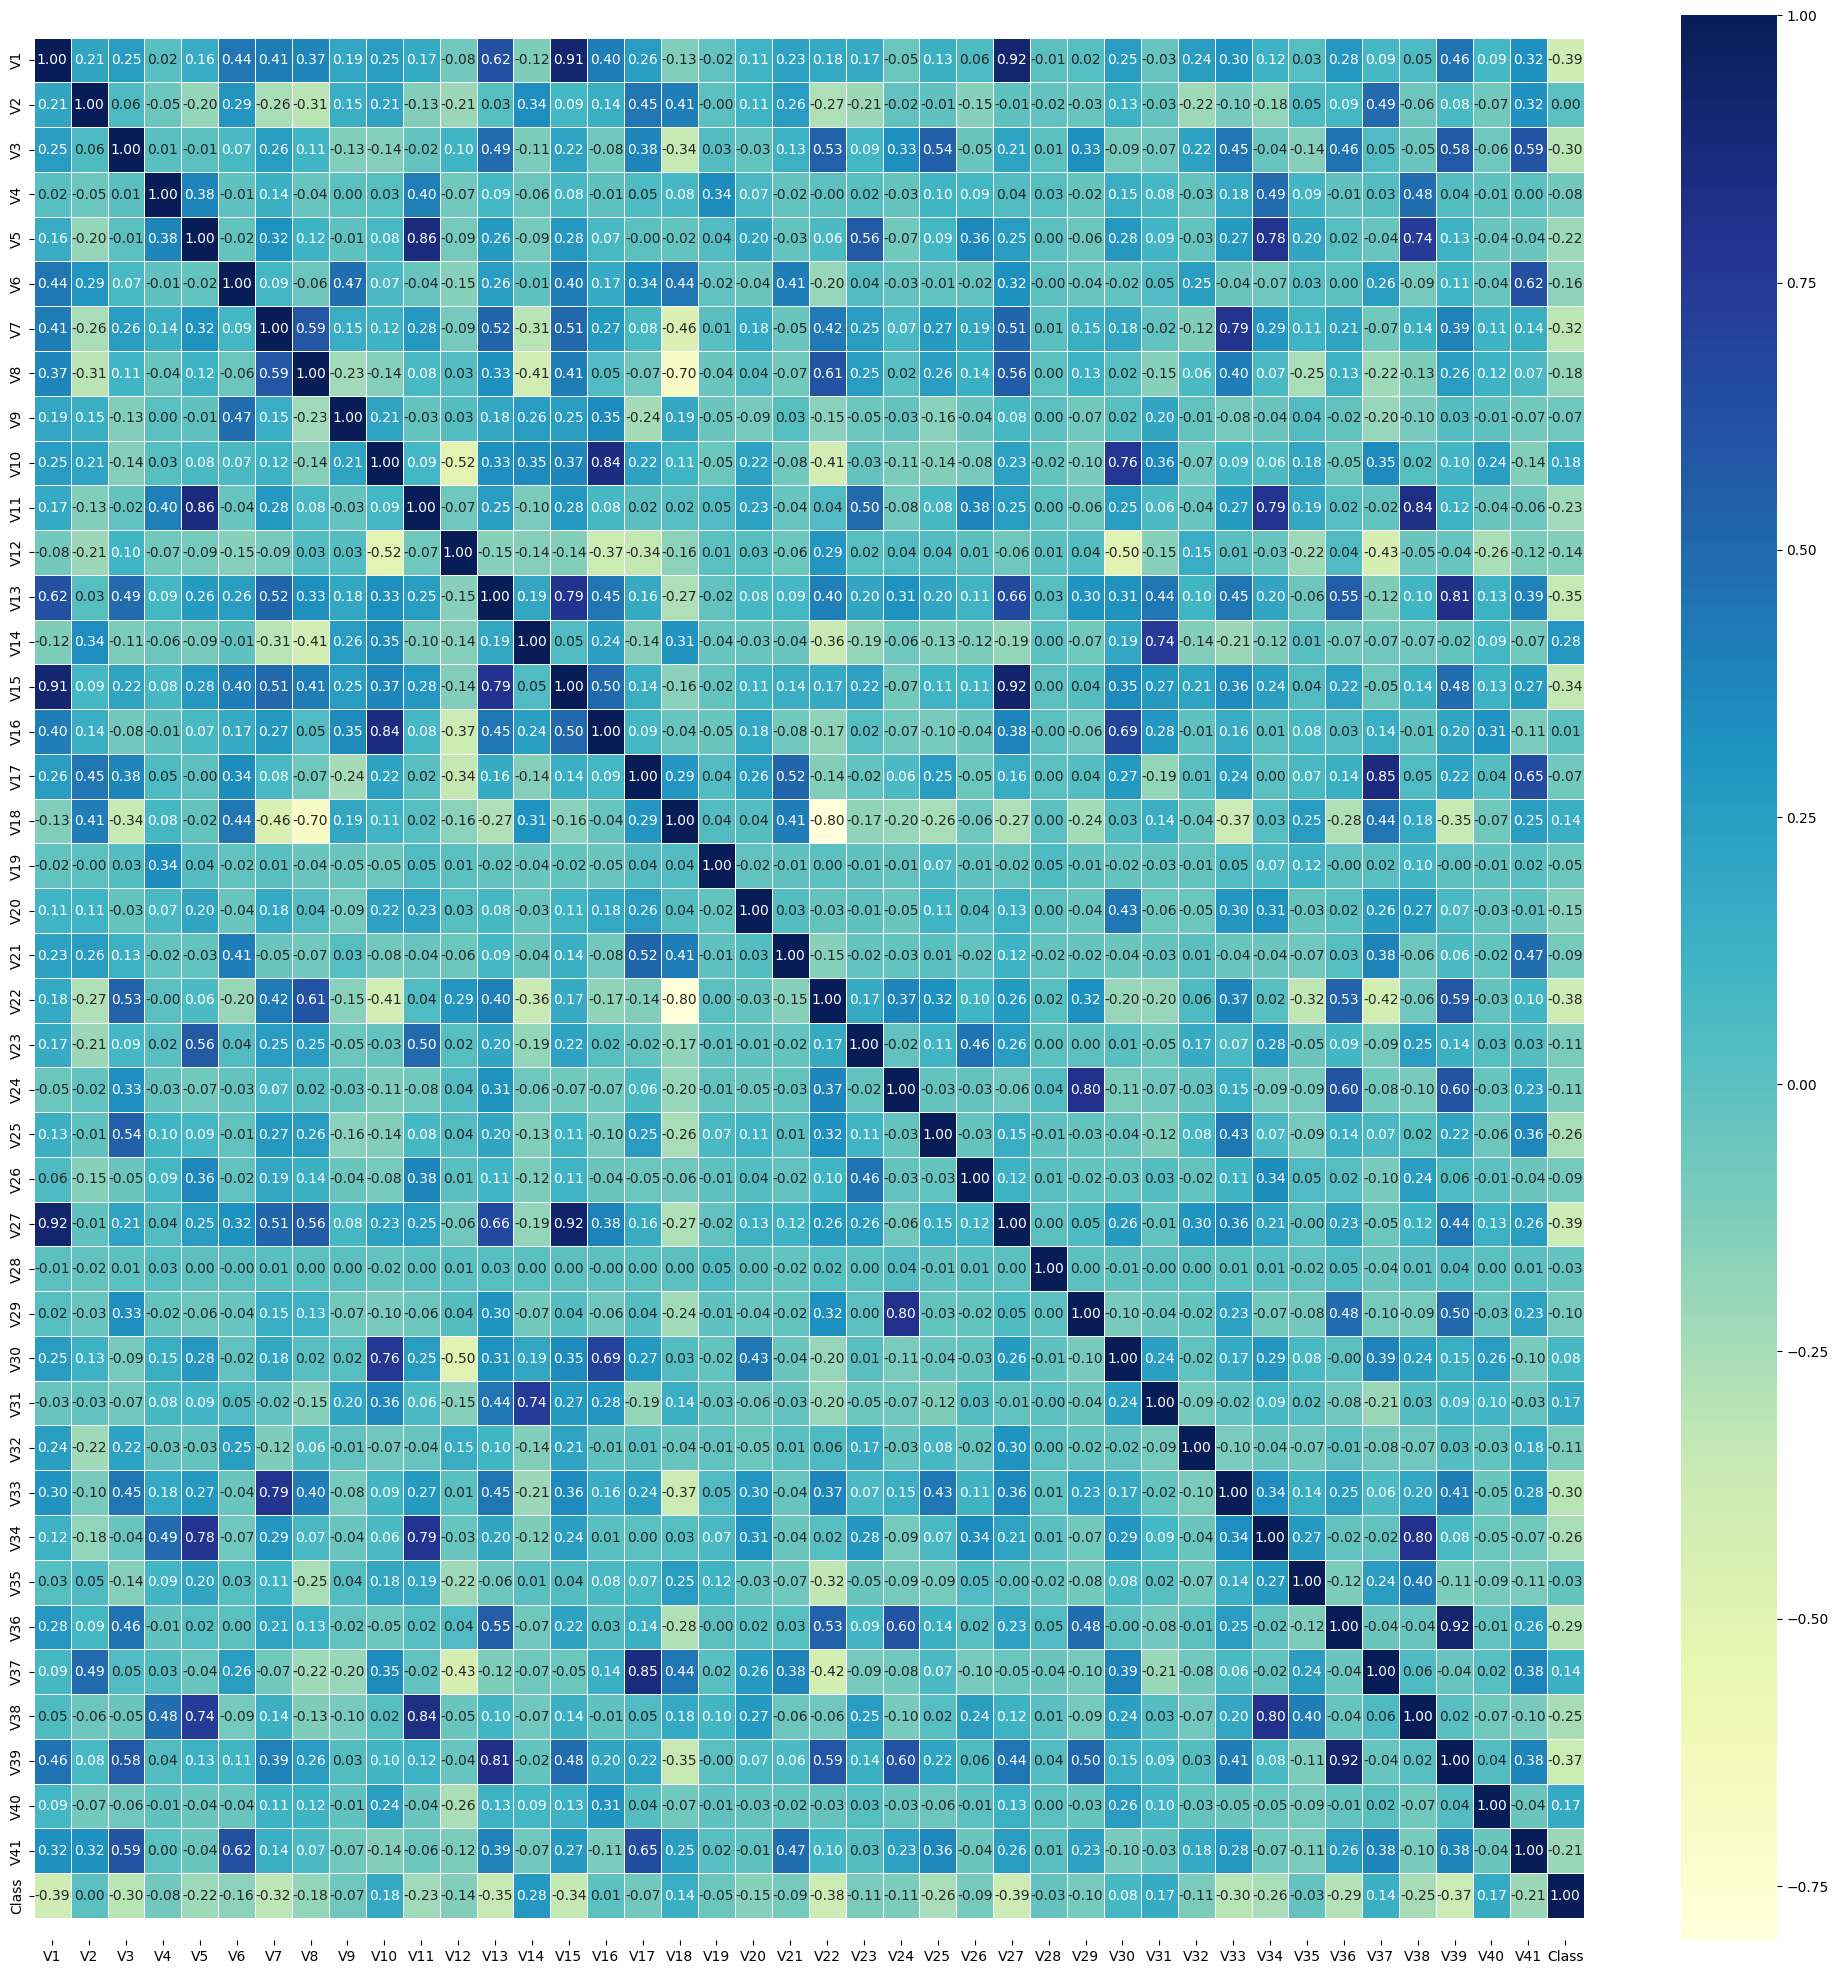

In [11]:
correlation_matrix = df_train.corr()
fig, ax = plt.subplots(figsize=(25, 25))

ax = sns.heatmap(
    correlation_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu"
)

# Jupyter notebook specific
bottom_side, top_side = ax.get_ylim()
ax.set_ylim(bottom_side + 0.5, top_side - 0.5)

We can see that there is the highest positive correlation in **V14** atribute and the highest negative value in the attributes **V1, V27** So lets see the distribution of those values in comparrison to class.

**V14 vs V17**

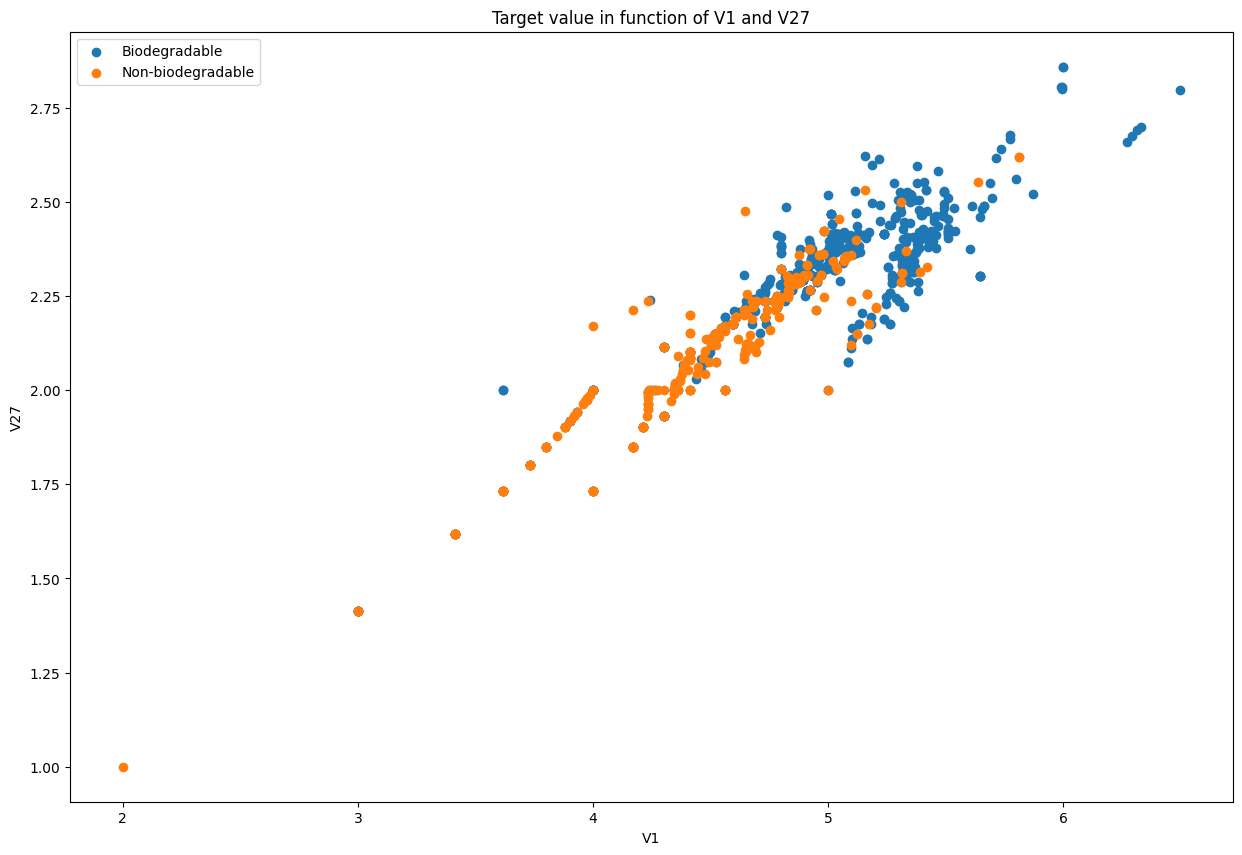

In [12]:

plt.figure(figsize=(15, 10))

# Scatter with 1 values of target class
plt.scatter(
    df_train['V1'][df_train['Class'] == 1],
    df_train['V27'][df_train['Class'] == 1],
)

# Scatter with  2 values of target class
plt.scatter(
    df_train['V1'][df_train['Class'] == 2],
    df_train['V27'][df_train['Class'] == 2],
)

plt.title('Target value in function of V1 and V27')

plt.xlabel('V1')
plt.ylabel('V27')
plt.legend(['Biodegradable', 'Non-biodegradable'])


In [13]:
# Spliting the data into features and labels
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Put models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: trest labels
    """

    # Set random seed
    np.random.seed(42)

    # Make a dictioanry to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

#### Check if there are any missing values

In [15]:
na_counts = df_train.isna().sum()
na_counts[na_counts > 0]


V4     25
V22    16
V27     8
V29     8
V37    25
dtype: int64

#### We can see that there are five atributes that have missing values. Lets inspect them.

##### V4

In [16]:
df_train['V4'].describe()

count    821.000000
mean       0.030451
std        0.198281
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: V4, dtype: float64

In [17]:
df_train['V4'].value_counts()

0.0    800
1.0     17
2.0      4
Name: V4, dtype: int64

We can see that the majority of entires in that particular atribute are zeros. So I think that it would be best if I set all the `Nan` values to zeros.

In [18]:
df_train['V4'].fillna(0, inplace=True)
df_test['V4'].fillna(0, inplace=True)

##### V22

In [19]:
df_train['V22'].describe()

count    830.000000
mean       1.243898
std        0.094109
min        0.898000
25%        1.187500
50%        1.248500
75%        1.298750
max        1.641000
Name: V22, dtype: float64

In [20]:
df_train['V22'].value_counts()

1.299    9
1.280    9
1.296    8
1.254    8
1.264    8
        ..
1.449    1
1.159    1
1.363    1
1.331    1
1.410    1
Name: V22, Length: 321, dtype: int64

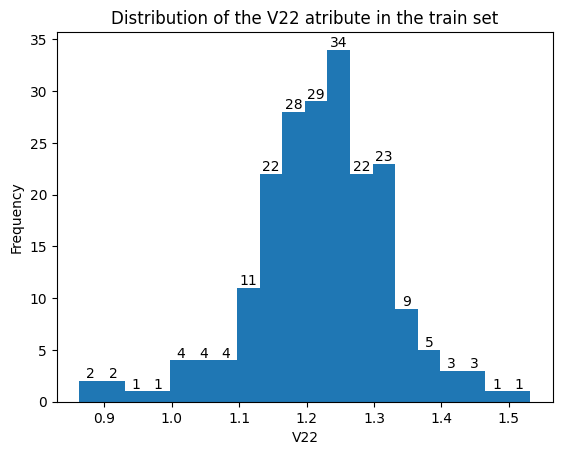

In [21]:
_, _, bars = plt.hist(df_test['V22'], bins=20)
plt.xlabel('V22')
plt.ylabel('Frequency')
plt.title('Distribution of the V22 atribute in the train set')
plt.bar_label(bars, fmt='%1.0f')
plt.show()

The distribution of the target variable **V22** is normal, so i could try to fill the missing values with `mean()`.

In [22]:
df_train['V22'].fillna(df_train['V22'].mean(), inplace=True)
df_test['V22'].fillna(df_test['V22'].mean(), inplace=True)

##### V27

In [23]:
df_train['V27'].describe()

count    838.000000
mean       2.218153
std        0.221545
min        1.000000
25%        2.107000
50%        2.251000
75%        2.359750
max        2.859000
Name: V27, dtype: float64

In [24]:
df_train['V27'].value_counts()

2.000    36
2.236    31
2.194    24
1.848    22
2.175    21
         ..
2.294     1
2.466     1
2.488     1
2.372     1
2.622     1
Name: V27, Length: 290, dtype: int64

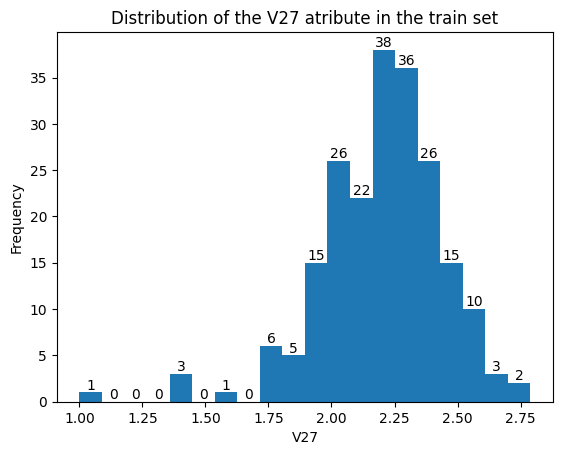

In [25]:
_, _, bars = plt.hist(df_test['V27'], bins=20)
plt.xlabel('V27')
plt.ylabel('Frequency')
plt.title('Distribution of the V27 atribute in the train set')
plt.bar_label(bars, fmt='%1.0f')
plt.show()

The distribution of the target variable **V27** is normal, so i could try to fill the missing values with `mean()`.

In [26]:
# Set the nan values to the mean of the column
df_train['V27'].fillna(df_train['V27'].mean(), inplace=True)
df_test['V27'].fillna(df_test['V27'].mean(), inplace=True)

##### V29

In [27]:
df_train['V29'].describe()

count    838.00000
mean       0.02506
std        0.15640
min        0.00000
25%        0.00000
50%        0.00000
75%        0.00000
max        1.00000
Name: V29, dtype: float64

In [28]:
df_train['V29'].value_counts()

0.0    817
1.0     21
Name: V29, dtype: int64

We can see that the majority of entires in that particular atribute are zeros. So I think that it would be best if I set all the `Nan` values to zeros.

In [29]:
# Set nan values to 0
df_train['V29'].fillna(0, inplace=True)
df_test['V29'].fillna(0, inplace=True)

##### V37

In [30]:
df_train['V37'].describe()

count    821.000000
mean       2.549406
std        0.625021
min        1.467000
25%        2.101000
50%        2.461000
75%        2.861000
max        5.750000
Name: V37, dtype: float64

In [31]:
df_train['V37'].value_counts()

2.167    9
2.500    9
2.833    8
2.667    8
1.833    7
        ..
2.029    1
1.886    1
2.089    1
2.197    1
2.206    1
Name: V37, Length: 535, dtype: int64

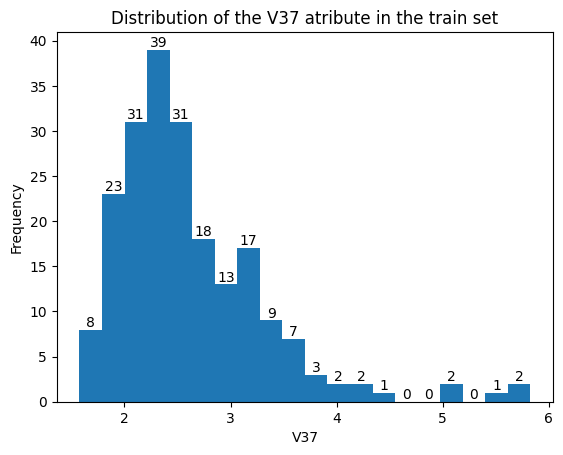

In [32]:
_, _, bars = plt.hist(df_test['V37'], bins=20)
plt.xlabel('V37')
plt.ylabel('Frequency')
plt.title('Distribution of the V37 atribute in the train set')
plt.bar_label(bars, fmt='%1.0f')
plt.show()

The distribution of the target variable **V37** is normal, so i could try to fill the missing values with `mean()`.

In [33]:
df_train['V37'].fillna(df_train['V37'].mean(), inplace=True)
df_test['V37'].fillna(df_test['V37'].mean(), inplace=True)

### 2.2 Modeling
Besides the baselines (majority classifier, random classifier), use at least three machine learning algorithms
to model the target class. Be ready to argue why did you select specific algorithms and how did you find
the best hyperparameters for them. Consider the following points when creating your models:
- Create your models using all features and subsets of them using various feature selection techniques.
- Certain models assume that data follows a particular distribution or may work better with other
types of variables (e.g., categorical instead of numeric). Explore whether you can come up with feature
transformations that are more appropriate for your models. Try to construct new features from existing
ones. Try to explain the results and performance of different models.

In [34]:
# Spliting the data into features and labels
X_train = df_train.drop('Class', axis=1).reset_index(drop=True)
y_train = df_train['Class'].reset_index(drop=True)
X_test = df_test.drop('Class', axis=1).reset_index(drop=True)
y_test = df_test['Class'].reset_index(drop=True)

#### Using majority classifier and random classifier

##### Majority classifier

In [35]:
# Get the reatio between thhe class we are trying to predict
y_train.value_counts(normalize=True)


1    0.666667
2    0.333333
Name: Class, dtype: float64

If we were to predict using the majority classifier then we would always predict Ready non-biodegradable.

In [36]:
y_test[y_test == 1].shape[0] / y_test.shape[0]

0.645933014354067

We would get the accuracy of 0.645933014354067 if we predicted all the values to be 1.

#### Random classifier

We have two classes to predict, so probability of predicting the right class is 50%.

#### Lets firstly write a simple function that will score all our generated models

In [37]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, RepeatedKFold
all_scores = []

def score_the_model(model, model_name, random_seed, X_train, X_test, y_train, y_test, plot=False):
    """
    Fits and evaluates given machine learning models.
    models: dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: trest labels
    """

    # Set random seed
    np.random.seed(random_seed)

    # Fit the model to the data
    model.fit(X_train, y_train)

    model_score = model.score(X_test, y_test) # Mean accuracy of ``self.predict(X)`` wrt. `y`.
    # Predict the labels
    y_pred = model.predict(X_test)

    # Compute scores
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    # Plot scores
    normal_scores = {
        'Accuracy': model_score,
        'F1': f1,
        'Precision': precision,
        'Recall': recall,
        'AUC': auc
    }

    def normal_cv(model, X_train, y_train, random_seed):
        # Perform normal cross-validation
        X_train = X_train.copy()
        y_train = y_train.copy()
        kfold = KFold(n_splits=5, shuffle=True, random_state=random_seed)
        scores = []

        for train_ix, test_ix in kfold.split(X_train):
            # Split the data
            X_train_cv, X_test_cv = X_train.iloc[train_ix], X_train.iloc[test_ix]
            y_train_cv, y_test_cv = y_train.iloc[train_ix], y_train.iloc[test_ix]

            # Fit the model
            model.fit(X_train_cv, y_train_cv)

            # Evaluate the model
            y_pred = model.predict(X_test_cv)
            scrs = {
                'Accuracy': model.score(X_test_cv, y_test_cv),
                'F1': f1_score(y_test_cv, y_pred),
                'Precision': precision_score(y_test_cv, y_pred),
                'Recall': recall_score(y_test_cv, y_pred),
                'AUC': roc_auc_score(y_test_cv, y_pred)
            }
            scores.append(scrs)
        
        # Plot all the scores
        scores = pd.DataFrame(scores)
        scores.plot(kind='bar', figsize=(10, 8))
        # Plot also the values at the top of the bars
        plt.title(f'Cross-validated scores for {model_name}')
        plt.xlabel('Fold')
        plt.ylabel('Score')
        plt.legend(loc='lower right')
        plt.show()
        return scores
    if type(X_train) == pd.core.frame.DataFrame:
        scores_cv = normal_cv(model, X_train, y_train, random_seed)

    def repeated_cv(model, X_train, y_train, random_seed):
        # Perform another cv with 10 folds
        scores_k_fold = []
        rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=random_seed)
        for train_index, test_index in rkf.split(X_train):
            model.fit(X_train.iloc[train_index], y_train.iloc[train_index])
            y_pred = model.predict(X_train.iloc[test_index])
            scrs = {
                'Accuracy': model.score(X_train.iloc[test_index], y_train.iloc[test_index]),
                'F1': f1_score(y_train.iloc[test_index], y_pred),
                'Precision': precision_score(y_train.iloc[test_index], y_pred),
                'Recall': recall_score(y_train.iloc[test_index], y_pred),
                'AUC': roc_auc_score(y_train.iloc[test_index], y_pred)
            }

            scores_k_fold.append(scrs)
        return scores_k_fold

    k_fold_scores_mean = {}
    k_fold_scores_std = {}

    if type(X_train) == pd.core.frame.DataFrame:
        scores_k_fold = repeated_cv(model, X_train, y_train, random_seed)
        k_fold_scores_mean['acccuracy_mean'] = np.mean([score['Accuracy'] for score in scores_k_fold])
        k_fold_scores_std['accuracy_std'] = np.std([score['Accuracy'] for score in scores_k_fold])  
        k_fold_scores_mean['f1_mean'] = np.mean([score['F1'] for score in scores_k_fold])
        k_fold_scores_std['f1_std'] = np.std([score['F1'] for score in scores_k_fold])
        k_fold_scores_mean['precision_mean'] = np.mean([score['Precision'] for score in scores_k_fold])
        k_fold_scores_std['precision_std'] = np.std([score['Precision'] for score in scores_k_fold])
        k_fold_scores_mean['recall_mean'] = np.mean([score['Recall'] for score in scores_k_fold])
        k_fold_scores_std['recall_std'] = np.std([score['Recall'] for score in scores_k_fold])
        k_fold_scores_mean['auc_mean'] = np.mean([score['AUC'] for score in scores_k_fold])
        k_fold_scores_std['auc_std'] = np.std([score['AUC'] for score in scores_k_fold])

    if plot:
        # Plot scores
        fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

        # Plot the bar chart of Normal cv scores in the first subplot 
        ax[0, 0].bar(normal_scores.keys(), normal_scores.values())
        # Display values of the bars
        for i, v in enumerate(normal_scores.values()):
            ax[0, 0].text(i-0.1, v+0.01, str(round(v, 2)))
        ax[0, 0].set_title(f'Default scoring of {model_name}')
        ax[0, 0].set_ylabel('Score')

        # Plot the k-fold cv scores in the third subplot
        ax[0, 1].bar(k_fold_scores_mean.keys(), k_fold_scores_mean.values())
        # Display values of the bars
        for i, v in enumerate(k_fold_scores_mean.values()):
            ax[0, 1].text(i-0.1, v+0.01, str(round(v, 2)))
        ax[0, 1].set_title(f'10-fold cross-validated scoring of {model_name} (mean)')

        # Plot the k-fold cv scores in the third subplot
        ax[1, 0].bar(k_fold_scores_std.keys(), k_fold_scores_std.values())
        ax[1, 0].set_title(f'10-fold cross-validated scoring of {model_name} (std)')

        
        # Plot the ROC curve in the second subplot
        f = RocCurveDisplay.from_estimator(model, X_test, y_test).plot(ax=ax[1, 1])
        
        # Plot the confusion matrix in the third subplot
        cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
        cm_plt = ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(ax=ax[2, 0])


        if hasattr(model, 'feature_importances_'):
            # Plot feature importance in the fourth subplot
            feature_dict = dict(zip(X_train.columns, model.feature_importances_))

            # Sort the features by their importance
            feature_dict = {k: v for k, v in sorted(feature_dict.items(), key=lambda item: item[1], reverse=True)}

            # Plot the feature importance
            ax[2, 1].bar(feature_dict.keys(), feature_dict.values())
            ax[2, 1].set_title(f'Feature importance of {model_name}')
            ax[2, 1].set_ylabel('Importance')
            ax[2, 1].set_xticklabels(feature_dict.keys(), rotation=90)
        else:
            ax[2, 1].set_visible(False)
        

    scores = []
    scores.append(normal_scores)
    normal_scores['model_name'] = model_name
    all_scores.append(normal_scores)
    return scores, model

### Decision tree model

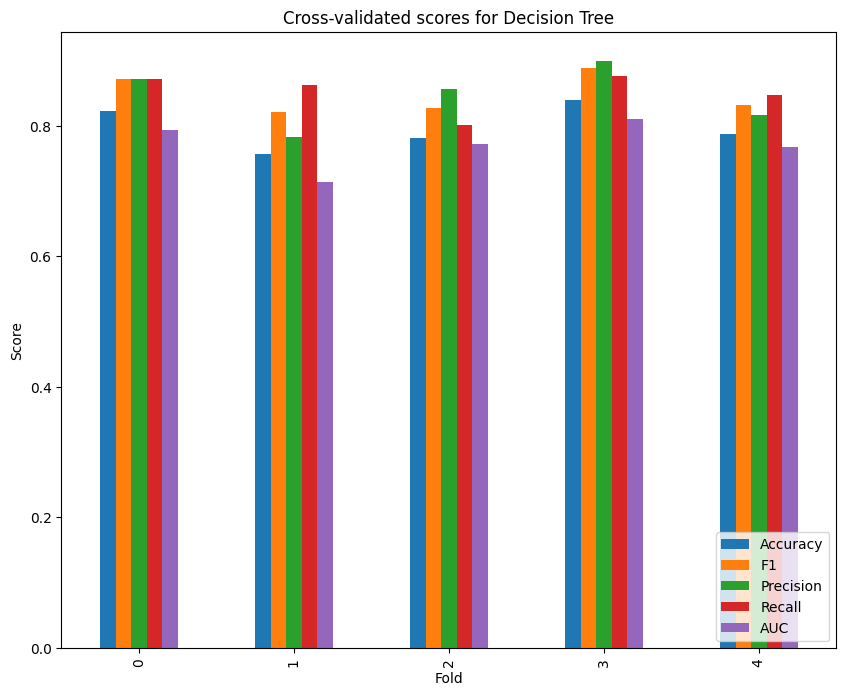

/tmp/ipykernel_189833/343368697.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2, 1].set_xticklabels(feature_dict.keys(), rotation=90)


[{'Accuracy': 0.8038277511961722, 'F1': 0.844106463878327, 'Precision': 0.8671875, 'Recall': 0.8222222222222222, 'AUC': 0.7962462462462462, 'model_name': 'Decision Tree'}]


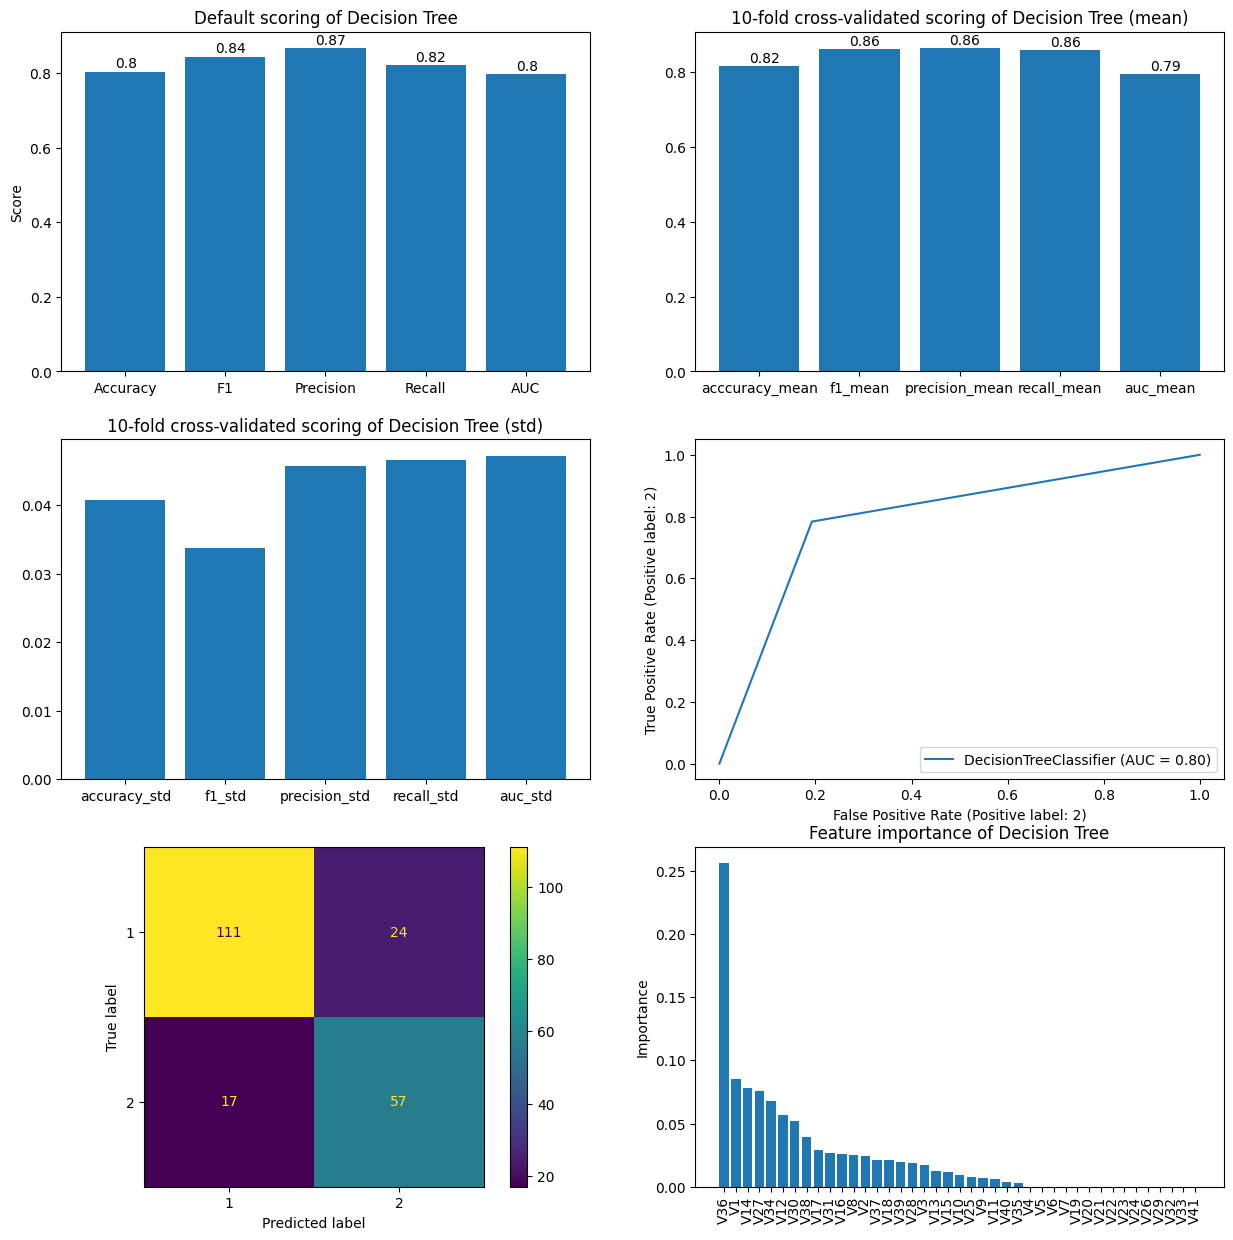

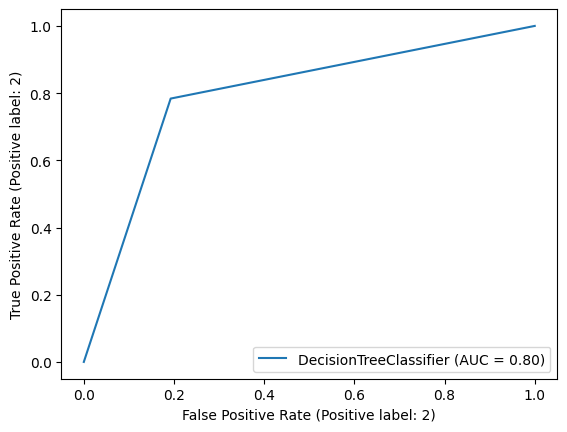

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Score the model with default parameters
score_dec_tree, model_dec_tree = score_the_model(
    model=DecisionTreeClassifier(),
    model_name='Decision Tree',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)

print(score_dec_tree)


Now lets plot the decision tree

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 40), dpi=400)
plot_tree(model_dec_tree, filled=True, rounded=True, class_names=['Ready biodegradable', 'Reday non-biodegradable'], feature_names=X_train.columns)

[Text(0.6062668766876688, 0.9705882352941176, 'V36 <= 3.678\ngini = 0.443\nsamples = 762\nvalue = [510, 252]\nclass = Ready biodegradable'),
 Text(0.40335283528352833, 0.9117647058823529, 'V1 <= 4.984\ngini = 0.485\nsamples = 325\nvalue = [134, 191]\nclass = Reday non-biodegradable'),
 Text(0.26755175517551755, 0.8529411764705882, 'V34 <= 1.5\ngini = 0.451\nsamples = 279\nvalue = [96, 183]\nclass = Reday non-biodegradable'),
 Text(0.16156615661566157, 0.7941176470588235, 'V14 <= 0.401\ngini = 0.347\nsamples = 206\nvalue = [46, 160]\nclass = Reday non-biodegradable'),
 Text(0.13276327632763277, 0.7352941176470589, 'V37 <= 3.15\ngini = 0.231\nsamples = 15\nvalue = [13, 2]\nclass = Ready biodegradable'),
 Text(0.11836183618361837, 0.6764705882352942, 'V28 <= 0.121\ngini = 0.133\nsamples = 14\nvalue = [13, 1]\nclass = Ready biodegradable'),
 Text(0.10396039603960396, 0.6176470588235294, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Ready biodegradable'),
 Text(0.13276327632763277, 0.

### Random Forrest Classifier

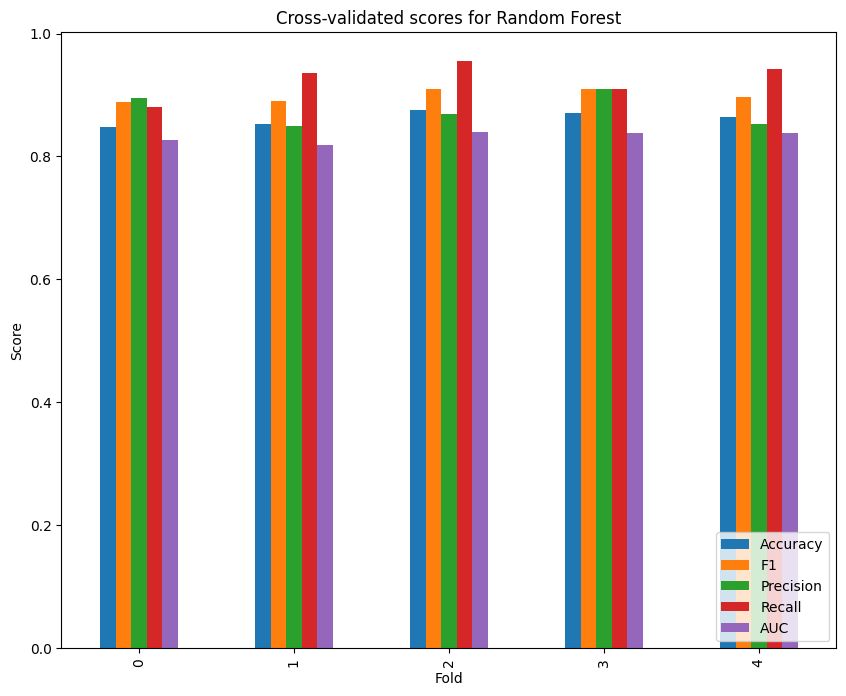

/tmp/ipykernel_189833/343368697.py:160: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2, 1].set_xticklabels(feature_dict.keys(), rotation=90)


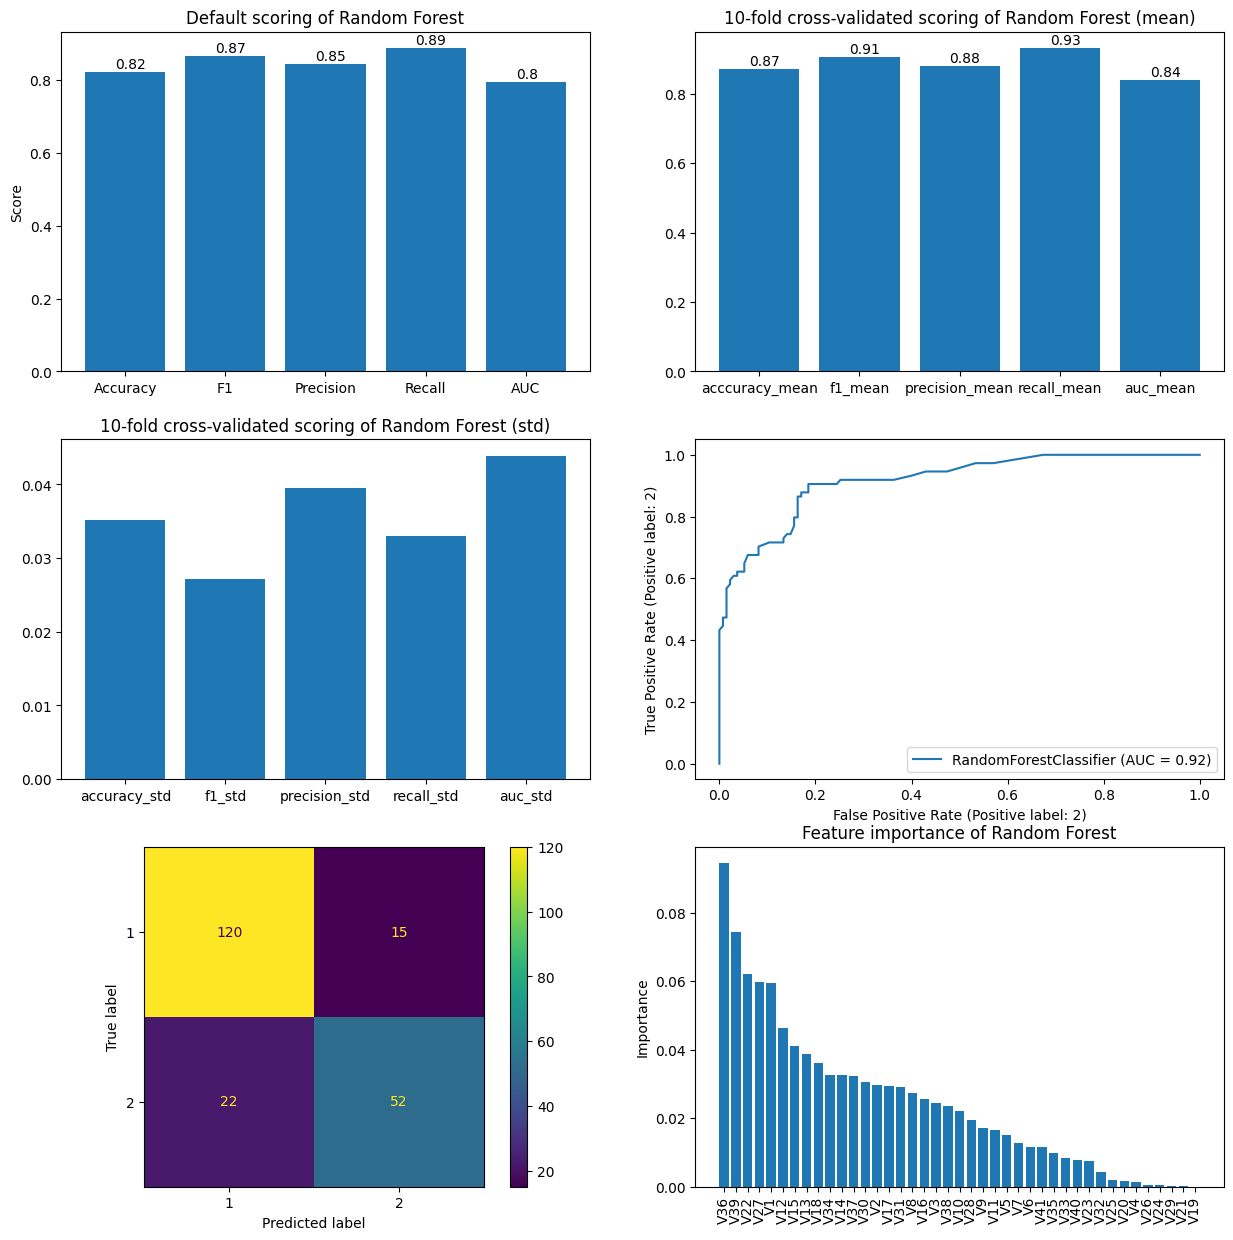

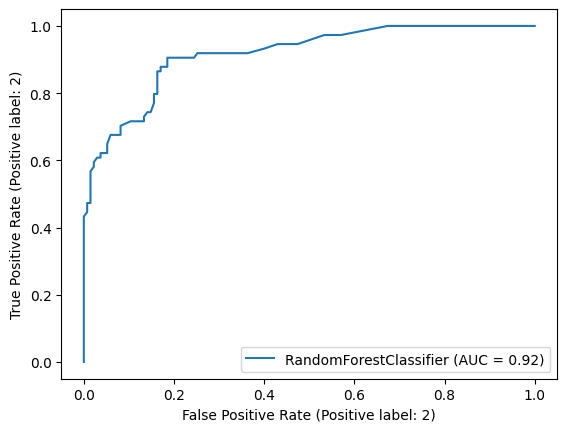

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Score the model with default parameters
score_rf, model_rf = score_the_model(
    model=RandomForestClassifier(),
    model_name='Random Forest',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)

### KNN

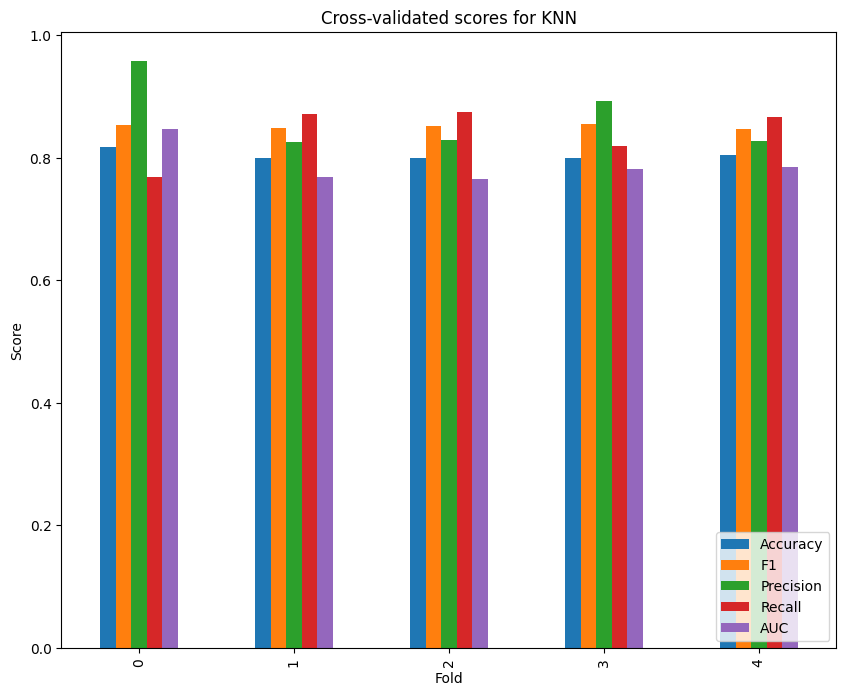

KeyboardInterrupt: 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Score the model with default parameters
score_knn, model_knn = score_the_model(
    model=KNeighborsClassifier(),
    model_name='KNN',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Score the model with default parameters
score_log_reg, model_log_reg = score_the_model(
    model=LogisticRegression(max_iter=100),
    model_name='Logistic Regression',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)

#### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Score the model with default parameters

scores_svm, model_svm = score_the_model(
    model=SVC(),
    model_name='SVM',
    random_seed=42,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test,
    plot=False
)

print(scores_svm)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Score the model with default parameters
score_gb, model_gb = score_the_model(
    model=GradientBoostingClassifier(),
    model_name='Gradient Boosting',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Score the model with default parameters
score_ada, model_ada = score_the_model(
    model=AdaBoostClassifier(
        estimator = RandomForestClassifier(),
        n_estimators=500000,
        learning_rate=0.001,
    ),
    model_name='AdaBoost',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)


Searching for the best params:

In [ ]:
best_params_gradient_boosting =  {
'validation_fraction': 0.3, 
'tol': 0.0001,
'subsample': 0.9,
'n_estimators': 50,
'min_samples_split': 5, 
'min_samples_leaf': 5,
'max_features': 'log2', 
'max_depth': 10, 
'learning_rate': 0.1
}

best_params_grad_boost_scores, best_params_grad_boost_model = score_the_model(
    model=GradientBoostingClassifier(**best_params_gradient_boosting),
    model_name='Gradient Boosting',
    random_seed=42,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    plot=True
)



### Comparisson between models performances

In [ ]:
# Plot Scores of all models
all_accuracy = [score['Accuracy'] for score in all_scores]
all_precision = [score['Precision'] for score in all_scores]
all_recall = [score['Recall'] for score in all_scores]
all_f1 = [score['F1'] for score in all_scores]
all_roc_auc = [score['AUC'] for score in all_scores]
model_names = [score['model_name'] for score in all_scores]

fig, ax = plt.subplots(3, 2, figsize=(25, 20))
fig.suptitle('Scores of all models', fontsize=20)

ax[0, 0].bar(model_names, all_accuracy)
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_ylabel('Accuracy')
ax[0, 0].set_xticklabels(model_names, rotation=90)

ax[0, 1].bar(model_names, all_precision)
ax[0, 1].set_title('Precision')
ax[0, 1].set_ylabel('Precision')
ax[0, 1].set_xticklabels(model_names, rotation=90)

ax[1, 0].bar(model_names, all_recall)
ax[1, 0].set_title('Recall')
ax[1, 0].set_ylabel('Recall')
ax[1, 0].set_xticklabels(model_names, rotation=90)

ax[1, 1].bar(model_names, all_f1)
ax[1, 1].set_title('F1')
ax[1, 1].set_ylabel('F1')
ax[1, 1].set_xticklabels(model_names, rotation=90)

ax[2, 0].bar(model_names, all_roc_auc)
ax[2, 0].set_title('ROC AUC')
ax[2, 0].set_ylabel('ROC AUC')
ax[2, 0].set_xticklabels(model_names, rotation=90)

ax[2, 1].set_visible(False)

plt.show()

### 2.3 Evaluation
Given that the data set is not in the ”big data” category, implement a cross-validation procedure based
on five folds (approximately equal sized) of your data. Furthermore, repeat the experiment 10 times with
different folds and average the results (include standard deviation). You are expected to report the following
metrics:
- F1
- Precision
- Recall
- AUC
Comment on the performance of algorithms and visualize their final scores. How do they perform against
the random baseline? What about the constant one? How do different learning scenarios impact the final
score? Are the differences between the models statistically significant?

### F1 score

The F1 score is a metric that combines precision and recall. It is often used in classification tasks as a way to balance the two metrics, as it can be difficult to optimize for both at the same time.
To compute the F1 score, you first need to calculate the precision and recall for a given model.

**Precision** 
P = TP/(TP + FP)

**Recall** 
R = TP/ (TP + FN)

Once you have calculated precision and recall, the F1 score is simply the harmonic mean of the two, computed using the following formula:

F1 = 2 * (precision * recall) / (precision + recall)

The F1 score ranges from 0 to 1, with a higher score indicating better performance. A perfect score is achieved when the precision and recall are both 1.

### Precision score

Precision is a metric that measures the accuracy of a classifier when it predicts the positive class. It is defined as the number of true positive predictions made by the classifier, divided by the total number of positive predictions made by the classifier.

In other words, precision is a measure of the proportion of positive predictions that are actually correct. It is a useful metric to consider when the cost of false positives is high, such as in cases where the classifier is being used to make important decisions (e.g. medical diagnosis, fraud detection).

Precision = True Positives / (True Positives + False Positives)

### Recall score


Recall is a metric that measures the ability of a classifier to detect all instances of the positive class. It is defined as the number of true positive predictions made by the classifier, divided by the total number of actual positive cases in the data.

In other words, recall is a measure of the proportion of actual positive cases that the classifier is able to identify. It is a useful metric to consider when the cost of false negatives is high, such as in cases where it is important to identify all instances of the positive class (e.g. cancer diagnosis, intrusion detection).

Recall = True Positives / (True Positives + False Negatives)

### AUC score

The AUC is calculated by plotting the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds. The TPR is defined as the number of true positive predictions made by the classifier, divided by the total number of actual positive cases in the data. The FPR is defined as the number of false positive predictions made by the classifier, divided by the total number of actual negative cases in the data.

The AUC is then calculated by computing the area under this curve. An AUC of 1 indicates a perfect classifier, while an AUC of 0.5 indicates a classifier that is no better than random.

The AUC can be calculated using the following formula:

AUC = (TPR1 - TPR0) + (TPR2 - TPR1) + ... + (TPRn - TPRn-1)

where TPRi is the TPR at the ith classification threshold and TPRi-1 is the TPR at the previous classification threshold.



## Report and presentation
The assignment has to be submitted in the form of two files: a markdown file and a PDF file created from
the R Studio markdown file (in RStudio → file - new file - R Markdown), where you write both the code,
as well as the text of answers (echo = T option must be enabled for each code block). Markdown files can
easily be exported to PDF using (“Knit”) button in R Studio. If you are using Python, you can produce a
similar report with Jupyter Notebook.